# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

--2021-04-09 09:24:12--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 997750 (974K) [image/jpeg]
Saving to: ‘100zloty.jpg’

100zloty.jpg        100%[===================>] 974.37K  --.-KB/s    in 0.02s   

2021-04-09 09:24:12 (51.7 MB/s) - ‘100zloty.jpg’ saved [997750/997750]



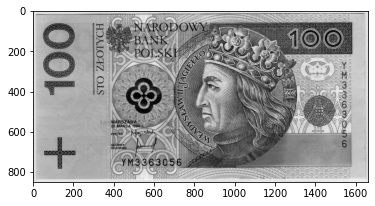

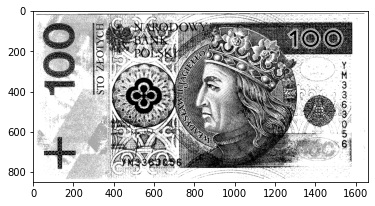

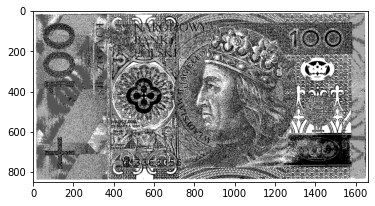

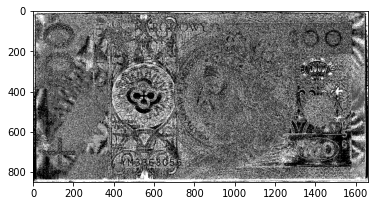

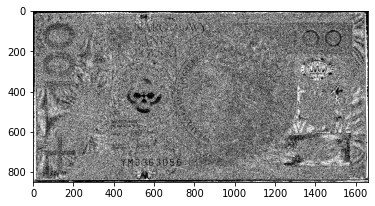

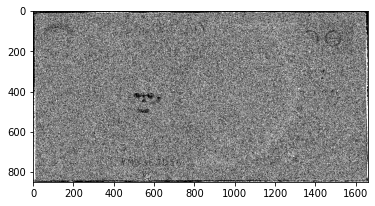

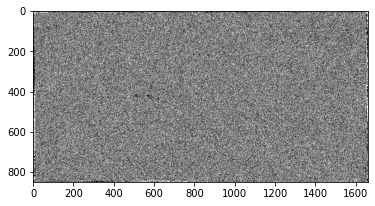

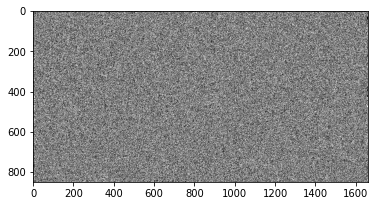

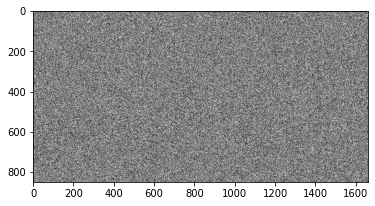

In [4]:
if not os.path.exists("100zloty.jpg") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

cashImg = cv2.imread('100zloty.jpg')
cashImg = cv2.cvtColor(cashImg, cv2.COLOR_BGR2GRAY)
plt.gray()
plt.imshow(cashImg)
plt.show()

# From MSB to LSB operation GRAY
mask = 0x80
layer_list = []
for i in range(0,8):

  img = cashImg & mask
  img = img << i
  img = img.astype('bool')

  plt.imshow(img)
  plt.show()
  
  layer_list.insert(i, img)
  mask = mask>>1


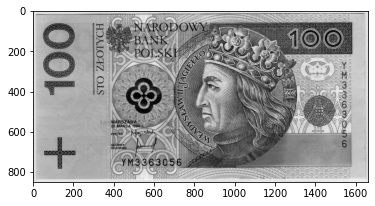

In [5]:
img = 0
offset = 7

for layer in layer_list:
  img += layer<<offset
  offset -= 1

plt.imshow(img) 
plt.show()

# RGB - from MSB to LSB operation 

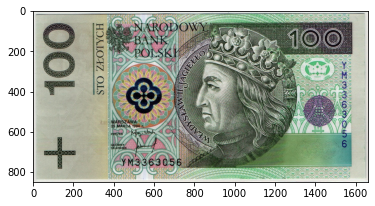

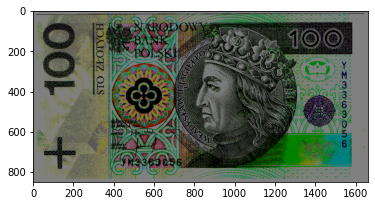

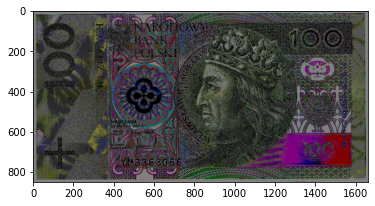

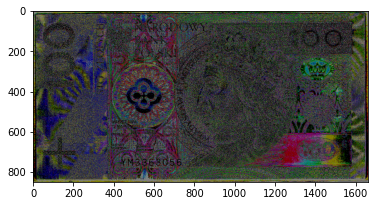

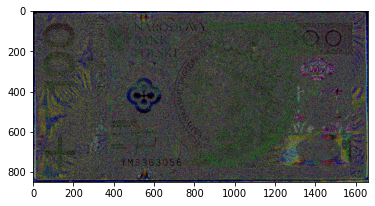

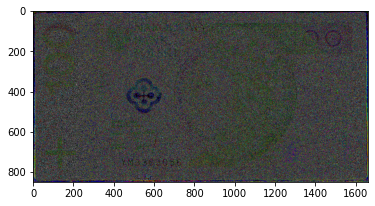

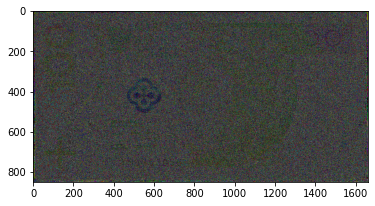

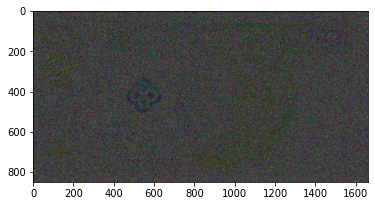

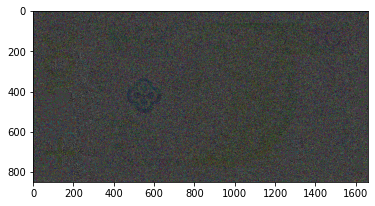

In [ ]:
cashImg = cv2.imread('100zloty.jpg')
plt.imshow(cashImg)
plt.show()

# From MSB to LSB operation RGB
mask = 0x80
color_layer_list = []
for i in range(0,8):

  img = cashImg & mask
  img = img << i

  plt.imshow(img)
  plt.show()
  
  color_layer_list.insert(i, img)
  mask = mask>>1

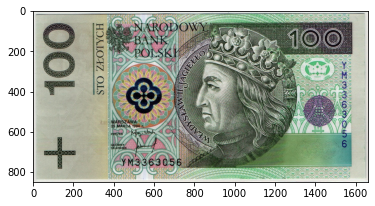

In [ ]:
img = 0
offset = 0

for layer in color_layer_list:
  img += layer>>offset
  offset += 1

plt.imshow(img) 
plt.show()